In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from catboost import CatBoostClassifier as cb
from catboost import Pool
from catboost import CatBoostRegressor as cbr

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
import os

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
model = cbr()

# Load the model from the .cbm file
model.load_model('cbm_4000_0.02_6_11.cbm')

In [19]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,GrLivArea,17.436172
1,OverallQual,16.753532
2,1stFlrSF,4.669272
3,KitchenQual,4.171326
4,TotalBsmtSF,4.165872
...,...,...
68,3SsnPorch,0.017739
69,LowQualFinSF,0.005379
70,Street,0.004957
71,MiscVal,0.004203


We want to get RMSE

In [28]:
feature_importance = model.get_feature_importance(prettified=True).head(20).sort_values(by='Importances', ascending=True)
feature_importance['Normalized Importance'] = feature_importance['Importances'] / feature_importance['Importances'].sum()

In [29]:
feature_importance

,Feature Id,Importances,Normalized Importance
19,ExterQual,1.175843,0.014307
18,HeatingQC,1.218888,0.014830
17,CentralAir,1.394170,0.016963
16,Neighborhood,1.734683,0.021106
15,YearRemodAdd,1.746971,0.021256
14,YearBuilt,1.851756,0.022531
13,GarageArea,2.338807,0.028457
12,OverallCond,2.493175,0.030335
11,GarageCars,2.603054,0.031672
10,GarageType,2.739983,0.033338


In [73]:
img_path = 'assets'

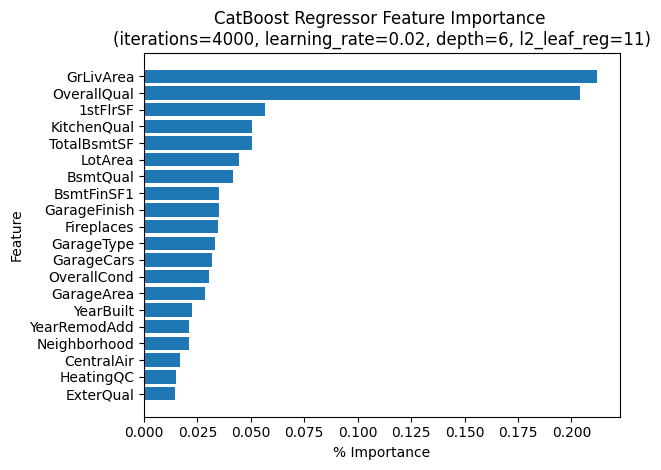

In [76]:
plt.ylabel('Feature')
plt.barh(feature_importance['Feature Id'], feature_importance['Normalized Importance'])
plt.title('CatBoost Regressor Feature Importance \n(iterations=4000, learning_rate=0.02, depth=6, l2_leaf_reg=11)')
plt.xlabel('% Importance')
plt.tight_layout()
plt.savefig(os.path.join('assets', 'feature_importance.png'))

In [34]:
top_20_feats = feature_importance['Feature Id'].to_list()
top_20_feats

['ExterQual',
 'HeatingQC',
 'CentralAir',
 'Neighborhood',
 'YearRemodAdd',
 'YearBuilt',
 'GarageArea',
 'OverallCond',
 'GarageCars',
 'GarageType',
 'Fireplaces',
 'GarageFinish',
 'BsmtFinSF1',
 'BsmtQual',
 'LotArea',
 'TotalBsmtSF',
 'KitchenQual',
 '1stFlrSF',
 'OverallQual',
 'GrLivArea']

Scores from the 4000 iteration, 0.02 lr, 6 depth, 11 leaf reg model.

In [7]:
scores = np.array([0.86024677, 0.93555535, 0.89238525, 0.87830393, 0.93284439,
       0.83312931, 0.91713409, 0.92254483, 0.93845652, 0.89242998])

In [8]:
scores.mean()

0.900303042

### Small Linear Regression for top variables: 


In [39]:
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
top_10_feats = feature_importance['Feature Id'].tail(10).to_list()
top_10_feats

['Fireplaces',
 'GarageFinish',
 'BsmtFinSF1',
 'BsmtQual',
 'LotArea',
 'TotalBsmtSF',
 'KitchenQual',
 '1stFlrSF',
 'OverallQual',
 'GrLivArea']

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = houses[top_10_feats]
y = houses['SalePrice']


In [43]:
X

,Fireplaces,GarageFinish,BsmtFinSF1,BsmtQual,LotArea,TotalBsmtSF,KitchenQual,1stFlrSF,OverallQual,GrLivArea
0,0,RFn,706,Gd,8450,856,Gd,856,7,1710
1,1,RFn,978,Gd,9600,1262,TA,1262,6,1262
2,1,RFn,486,Gd,11250,920,Gd,920,7,1786
3,1,Unf,216,TA,9550,756,Gd,961,7,1717
4,1,RFn,655,Gd,14260,1145,Gd,1145,8,2198
...,...,...,...,...,...,...,...,...,...,...
1455,1,RFn,0,Gd,7917,953,TA,953,6,1647
1456,2,Unf,790,Gd,13175,1542,TA,2073,6,2073
1457,2,RFn,275,TA,9042,1152,Gd,1188,7,2340
1458,0,Unf,49,TA,9717,1078,Gd,1078,5,1078


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(X[['GarageFinish', 'KitchenQual', 'BsmtQual']])
encoded_feature_names = encoder.get_feature_names_out(['GarageFinish', 'KitchenQual', 'BsmtQual'])

In [53]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)
df_encoded

,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1456,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1457,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [54]:
X_encoded = pd.concat([X.drop(columns=['GarageFinish', 'KitchenQual', 'BsmtQual']), df_encoded], axis=1)
X_encoded

,Fireplaces,BsmtFinSF1,LotArea,TotalBsmtSF,1stFlrSF,OverallQual,GrLivArea,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan
0,0,706,8450,856,856,7,1710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,978,9600,1262,1262,6,1262,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,486,11250,920,920,7,1786,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,216,9550,756,961,7,1717,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,655,14260,1145,1145,8,2198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,7917,953,953,6,1647,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1456,2,790,13175,1542,2073,6,2073,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1457,2,275,9042,1152,1188,7,2340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0,49,9717,1078,1078,5,1078,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [56]:
X_train

,Fireplaces,BsmtFinSF1,LotArea,TotalBsmtSF,1stFlrSF,OverallQual,GrLivArea,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan
254,0,922,8400,1314,1314,5,1314,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1066,1,0,7837,799,799,6,1571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
638,0,0,8777,796,796,5,796,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
799,2,569,7200,731,981,5,1768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
380,1,218,5000,1026,1026,5,1691,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,24,9317,1314,1314,6,1314,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1130,2,622,7804,1122,1328,4,1981,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,0,167,8172,864,864,5,864,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,1,0,7642,912,912,7,1426,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score

In [63]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.832041927164164

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

35892.80161510601

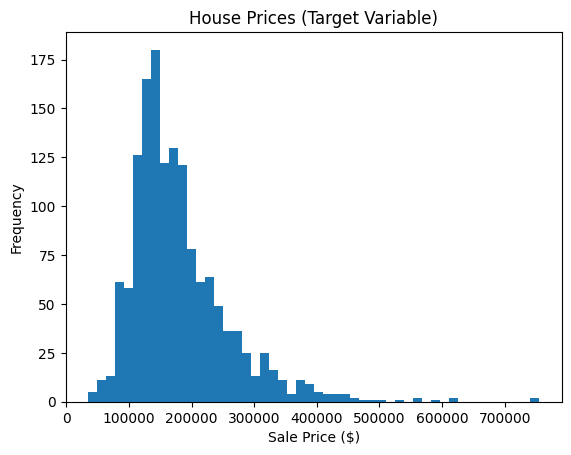

In [74]:
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.title('House Prices (Target Variable)')
plt.hist(y, bins= 50)
plt.savefig(os.path.join(img_path, 'house_prices_hist.png'))